In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

In [1]:
#!pip install ucimlrepo
# ucimlrepo: UCI Machine Learning Repository에 등록된 다양한 머신러닝 데이터셋에 손쉽게 접근할 수 있도록 도와주는 Python 라이브러리

## Default(연체) of Credit Card Clients 데이터셋
* 대만의 신용카드 고객 데이터를 기반으로 하며, 고객의 신용카드 대출 연체 여부와 관련된 정보를 포함한다.
*  target => 연체여부(범주형 자료)

In [72]:
from ucimlrepo import fetch_ucirepo
# fetch_ucirepo 함수
# ucimlrepo 라이브러리에서 UCI Machine Learning Repository의 최신 데이터셋 목록 및 메타데이터를 프로그램 방식으로 가져오는 역할을 한다.

In [73]:
default_of_credit_card_clients = fetch_ucirepo(id=350)
# ucimlrepo 라이브러리에서 특정 데이터셋을 식별하기 위해 제공되는 고유 ID 값을 사용하여
# UCI Machine Learning Repository에서 해당 데이터셋의 상세 정보를 가져오는 함수를 호출한다.

In [74]:
type(default_of_credit_card_clients)

ucimlrepo.dotdict.dotdict

### ucimlrepo.dotdict.dotdict 타입
* Python의 기본 dict 클래스를 확장하여, 딕셔너리의 키에 대해 객체의 속성처럼 접근할 수 있도록 만든 **사용자 정의 데이터 타입**이다.
* 이 타입은 특히 **데이터셋의 메타데이터**나 **설정 정보**를 보다 직관적이고 간결하게 다루기 위해 사용된다.

In [7]:
default_of_credit_card_clients.metadata

{'uci_id': 350,
 'name': 'Default of Credit Card Clients',
 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients',
 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv',
 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.",
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 30000,
 'num_features': 23,
 'feature_types': ['Integer', 'Real'],
 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'],
 'target_col': ['Y'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Fri Mar 29 2024',
 'dataset_doi': '10.24432/C55S3H',
 'creators': ['I-Cheng Yeh'],
 'intro_paper': {'ID': 365,
  'type': 'NATIVE',
  'title': 'The comparisons of data mining techniques for the

In [8]:
default_of_credit_card_clients.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,X1,Feature,Integer,None,LIMIT_BAL,None,no
2,X2,Feature,Integer,Sex,SEX,None,no
3,X3,Feature,Integer,Education Level,EDUCATION,None,no
4,X4,Feature,Integer,Marital Status,MARRIAGE,None,no
5,X5,Feature,Integer,Age,AGE,None,no
6,X6,Feature,Integer,None,PAY_0,None,no
7,X7,Feature,Integer,None,PAY_2,None,no
8,X8,Feature,Integer,None,PAY_3,None,no
9,X9,Feature,Integer,None,PAY_4,None,no


In [12]:
default_of_credit_card_clients.data.targets

,Y
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [13]:
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 

In [14]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [15]:
X.shape, y.shape

((30000, 23), (30000, 1))

In [16]:
X.ndim, y.ndim

(2, 2)

In [18]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
y.head()

,Y
0,1
1,1
2,0
3,0
4,0


## X1에 대한 데이터 전처리
* X1: 신용 한도(LIMIT_BAL) =>  금융기관이나 신용카드 회사가 고객의 신용 상태를 평가하여 부여하는 금액. 고객에게 할당된 최대 신용 금액.

In [19]:
X['X1'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: X1, dtype: float64

In [21]:
X['X1'].skew(), X['X1'].kurt()

(np.float64(0.992866960519544), np.float64(0.536262896398668))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

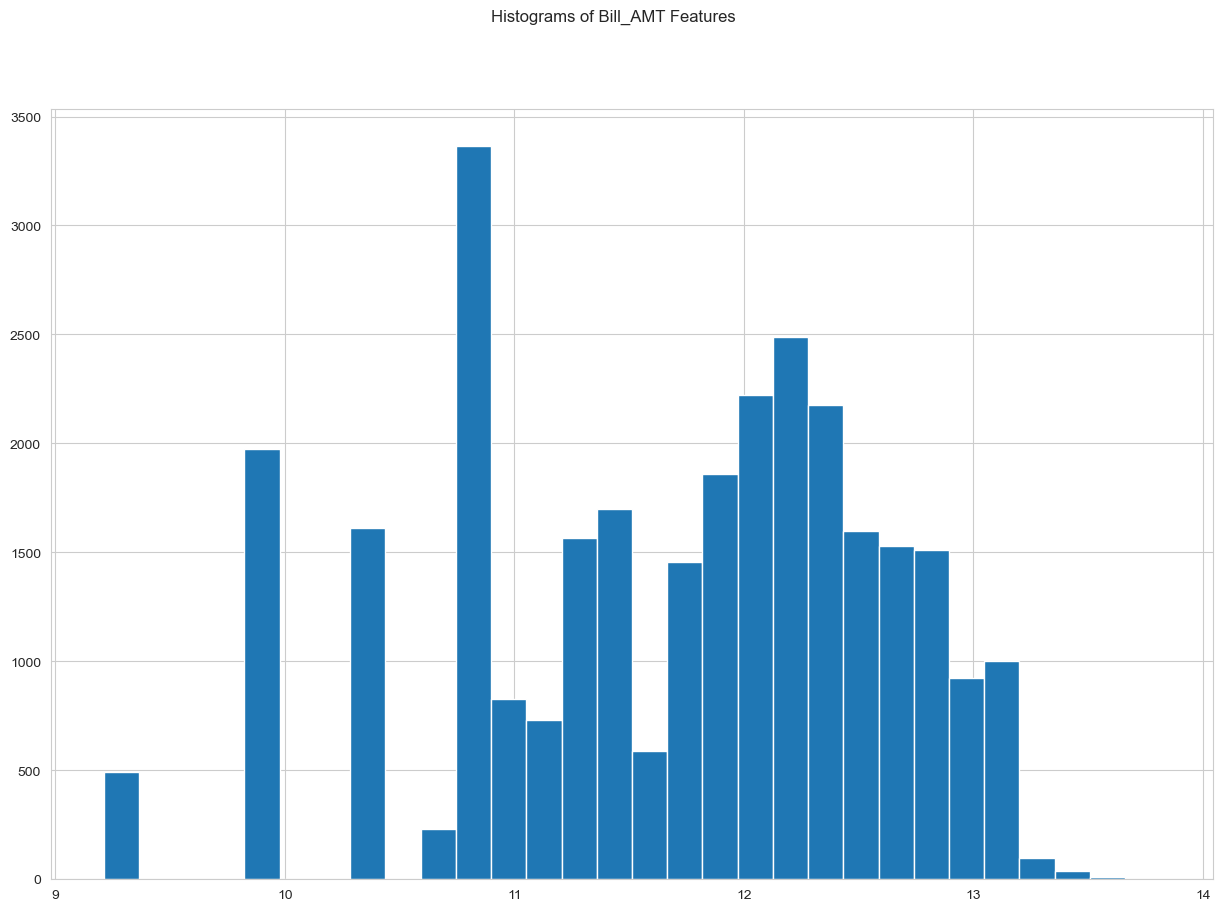

In [26]:
X['X1'].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Bill_AMT Features")
plt.show()

#### 분포의 특성을 확인해야 한다.
#### 로그변환 후 정규화하는 것이 바람직하다.

In [24]:
X.loc[:, 'X1'] = X['X1'].apply(lambda x: np.log1p(x)) #log(x + 1)

/var/folders/rq/s12_p4j17zq3vjxlk04m9ntc0000gn/T/ipykernel_28820/1383377836.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 9.90353755 11.69525536 11.40757606 ... 10.30898599 11.28979441
 10.81979828]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, 'X1'] = X['X1'].apply(lambda x: np.log1p(x))


In [25]:
X['X1']

0         9.903538
1        11.695255
2        11.407576
3        10.819798
4        10.819798
           ...    
29995    12.301387
29996    11.918397
29997    10.308986
29998    11.289794
29999    10.819798
Name: X1, Length: 30000, dtype: float64

## 인구학적 특성(X2(Sex), X3(Education Level), X4(Marital Status))에 대한 데이터 전처리
* One-Hot-Encoding을 수행
* (이유) LDA는 각 특성이 연속적인 값(정규분포 가정)을 따르며 공분산을 추정하는 데 기반 => 범주형 변수를 그대로 사용하면 숫자 관측값이 내재한 순서나 크기가 실제 의미와 다르게 작용할 수 있다.

In [27]:
categorical_cols = ['X2', 'X3', 'X4']
X_1 = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first = True !!!!!!

In [28]:
X_1

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,9.903538,24,2,2,-1,-1,-2,-2,3913,3102,...,True,False,True,False,False,False,False,True,False,False
1,11.695255,26,-1,2,0,0,0,2,2682,1725,...,True,False,True,False,False,False,False,False,True,False
2,11.407576,34,0,0,0,0,0,0,29239,14027,...,True,False,True,False,False,False,False,False,True,False
3,10.819798,37,0,0,0,0,0,0,46990,48233,...,True,False,True,False,False,False,False,True,False,False
4,10.819798,57,-1,0,-1,0,0,0,8617,5670,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12.301387,39,0,0,0,0,0,0,188948,192815,...,False,False,False,True,False,False,False,True,False,False
29996,11.918397,43,-1,-1,-1,-1,0,0,1683,1828,...,False,False,False,True,False,False,False,False,True,False
29997,10.308986,37,4,3,2,-1,0,0,3565,3356,...,False,False,True,False,False,False,False,False,True,False
29998,11.289794,41,1,-1,0,0,0,-1,-1645,78379,...,False,False,False,True,False,False,False,True,False,False


## X6 ~ X11(description: PAY_0, PAY_2 ~ PAY_6)에 대한 데이터 전처리
* X6 ~ X11의 관측값: 고객의 과거 지불 상태를 나타내는 정수 값
* X6 ~ X11: 각 특성의 정수 값(예: -1, 0, 1, 2, …)은 각 상태(예: 정상, 지연 등)를 나타낸다. 이 변수들은 **순서형(ordinal) 변수**
    * 범주형과 달리 순서가 중요함..! -> 더미로 변경하면 안될듯..?
* 순서형 변수를 그대로 사용하여, 정규화하는 것이 바람직하다.

## X12 ~ X17(description: BILL_AMT1 ~ BILL_AMT6)에 대한 데이터 전처리
### X12 ~ X17: 고객의 지난 6개월 동안 청구된 금액(계산서 금액, Bill Amount)
* BILL_AMT1: 가장 최근 한 달 동안의 청구 금액
* BILL_AMT2: 그 전 달의 청구 금액
...
* BILL_AMT6: 6개월 전의 청구 금액
-> 이 특성들의 관측값은 고객의 신용카드 이용 내역을 반영하며, 청구서에 기재된 결제해야 할 금액을 의미한다.
=> 연속형 수치형 변수들 
#### 분포의 특성을 확인해야 한다.
#### 로그변환 후 정규화하는 것이 바람직하다.

In [29]:
bill_amt_cols = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
X_1[bill_amt_cols]

,X12,X13,X14,X15,X16,X17
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [30]:
X_1[bill_amt_cols].describe()

,X12,X13,X14,X15,X16,X17
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [25]:
X_1[bill_amt_cols].skew()

X12    2.663861
X13    2.705221
X14    3.087830
X15    2.821965
X16    2.876380
X17    2.846645
dtype: float64

In [26]:
X_1[bill_amt_cols].kurt()

X12     9.806289
X13    10.302946
X14    19.783255
X15    11.309325
X16    12.305881
X17    12.270705
dtype: float64

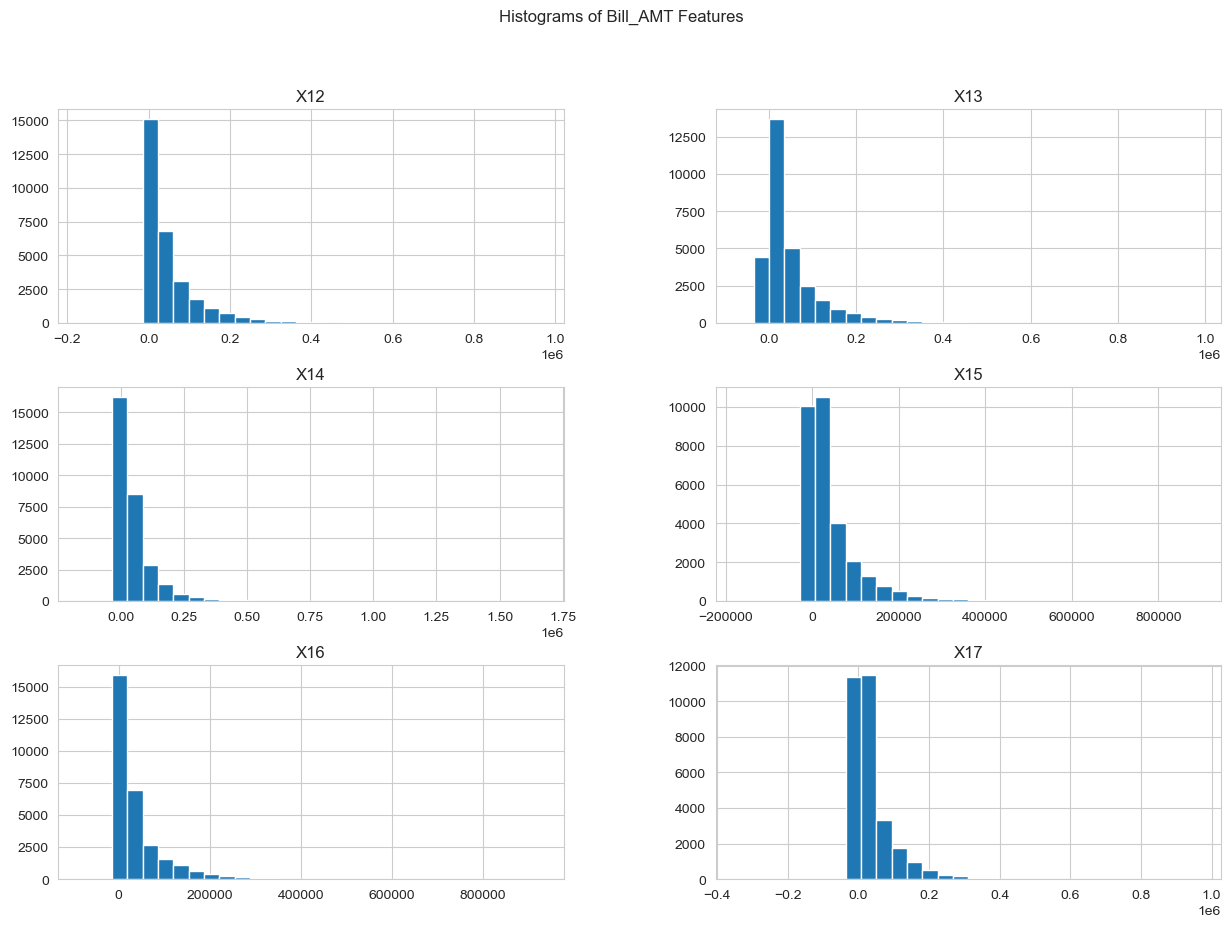

In [31]:
X_1[bill_amt_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Bill_AMT Features")
plt.show()

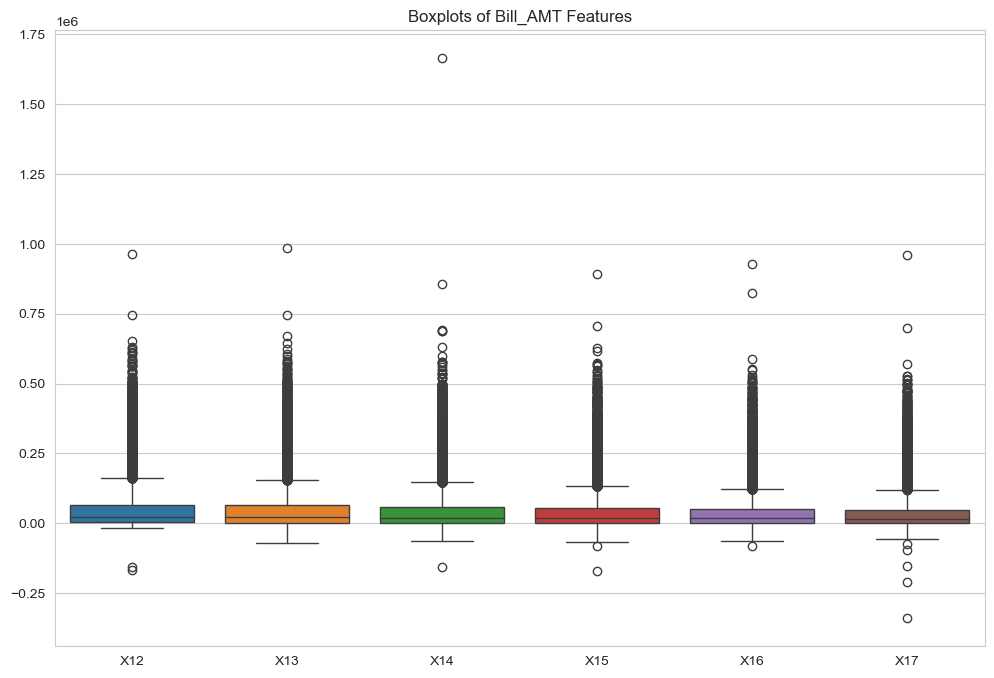

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_1[bill_amt_cols])
plt.title("Boxplots of Bill_AMT Features")
plt.show()

#### Bill_AMT1부터 Bill_AMT6 변수들은 고객의 청구 금액을 나타낸다.
#### 대부분의 고객은 낮은 청구 금액을 보이지만 일부 고객의 경우 매우 높은 금액이 기록되어, 긴 오른쪽 꼬리를 가진 분포다.
#### 극단치가 많이 존재한다.  

#### < 데이터 전처리 >
* **로그변환**을 통해 분포의 비대칭성을 완화한다.
* **정규화**를 통해 변수 간 스케일을 맞춘다.

In [ ]:
epsilon = 1e-6  # 아주 작은 양수 -> 여기에서는 음수의 값이 포함되어 있으므로....
X_1.loc[:, bill_amt_cols] = X_1.loc[:, bill_amt_cols].apply(lambda x: np.log1p(np.where(x < epsilon, epsilon, x)))

In [34]:
X_1.loc[:, bill_amt_cols] = X_1.loc[:, bill_amt_cols].apply(lambda x: np.log1p(x))

In [35]:
X_1[bill_amt_cols]

,X12,X13,X14,X15,X16,X17
0,2.227033e+00,2.201673,2.019783,9.999990e-07,9.999990e-07,9.999990e-07
1,2.185455e+00,2.134588,2.185455,2.207556e+00,2.213521e+00,2.207185e+00
2,2.423323e+00,2.356013,2.352791,2.358043e+00,2.362023e+00,2.365730e+00
3,2.464509e+00,2.466727,2.468567,2.420470e+00,2.422470e+00,2.424251e+00
4,2.308727e+00,2.266245,2.441191,2.393291e+00,2.385077e+00,2.385005e+00
...,...,...,...,...,...,...
29995,2.576363e+00,2.577903,2.583775,2.516498e+00,2.429164e+00,2.368294e+00
29996,2.131670e+00,2.141421,2.214996,2.312808e+00,2.257031e+00,9.999990e-07
29997,2.216940e+00,2.210339,2.188590,2.393020e+00,2.391714e+00,2.386086e+00
29998,9.999990e-07,2.507102,2.504913,2.474334e+00,2.339938e+00,2.467968e+00


## X18 ~ X23(description: PAY_AMT1 ~ PAY_AMT6)에 대한 데이터 전처리
### X18 ~ X23: 고객이 최근 6개월 동안 실제로 지불한 금액
* PAY_AMT1: 가장 최근 월의 지불금액
* PAY_AMT2: 그 전 달의 지불 금액
...
* PAY_AMT6: 6개월 전의 지불 금액
=> 실제 금액이 기록되므로 연속형 수치형 변수들 
#### 분포의 특성을 확인해야 한다.
#### 로그변환 후 정규화하는 것이 바람직하다.

In [40]:
pay_amt_cols = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
X_1[pay_amt_cols].describe()

,X18,X19,X20,X21,X22,X23
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [41]:
X_1[pay_amt_cols].skew()

X18    14.668364
X19    30.453817
X20    17.216635
X21    12.904985
X22    11.127417
X23    10.640727
dtype: float64

In [42]:
X_1[pay_amt_cols].kurt()

X18     415.254743
X19    1641.631911
X20     564.311229
X21     277.333768
X22     180.063940
X23     167.161430
dtype: float64

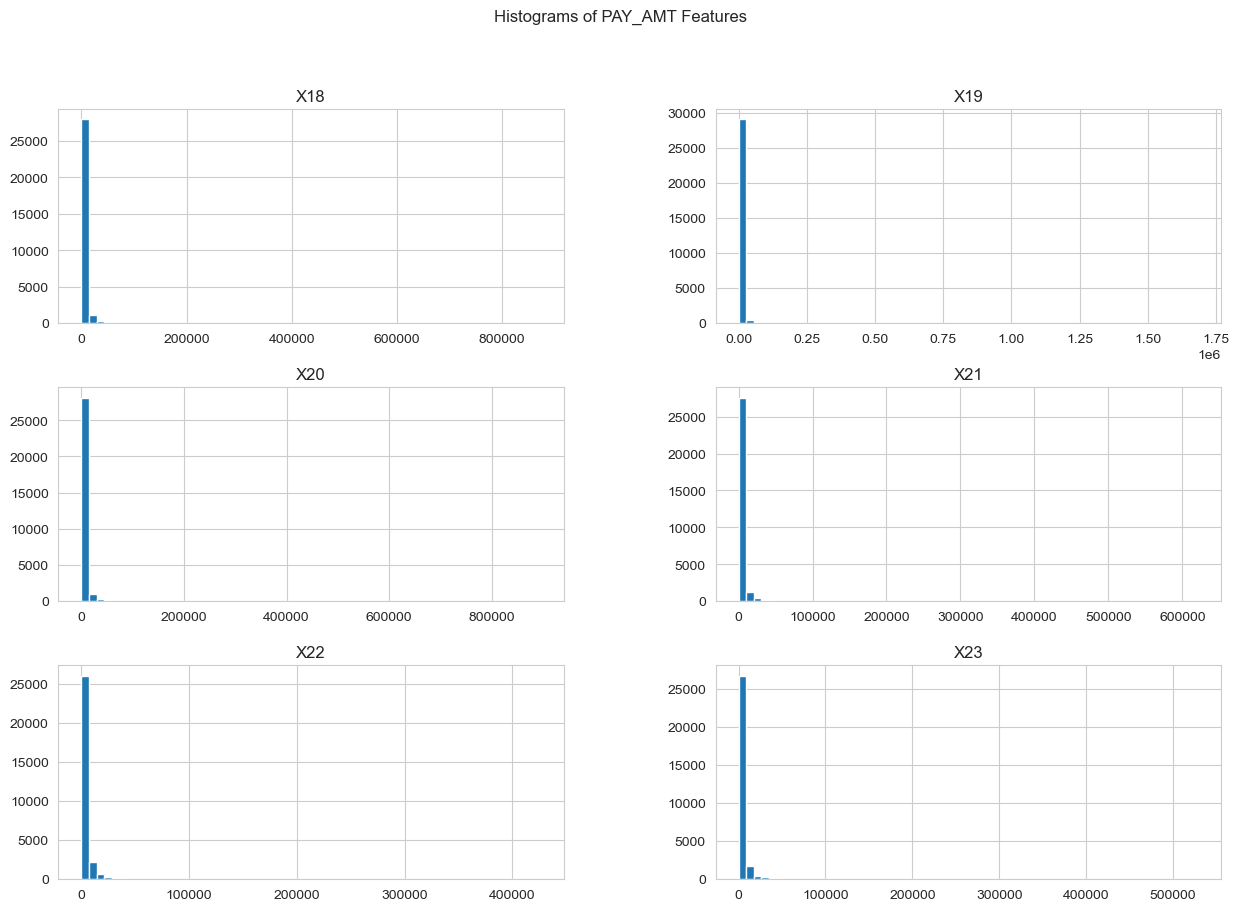

In [43]:
X_1[pay_amt_cols].hist(bins=60, figsize=(15, 10))
plt.suptitle("Histograms of PAY_AMT Features")
plt.show()

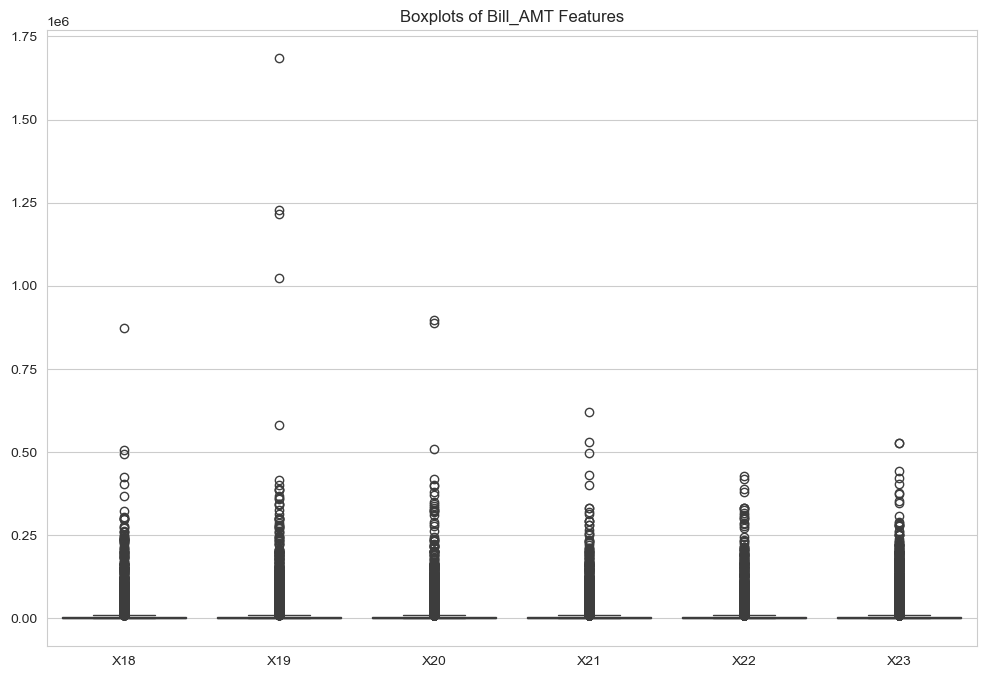

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_1[pay_amt_cols])
plt.title("Boxplots of Bill_AMT Features")
plt.show()

#### Pay_AMT1부터 Pay_AMT6 변수들은 전체적으로 오른쪽으로 치우친 분포를 보인다.
#### 대부분의 고객은 낮은 지불 금액을 기록하지만 일부 고객의 경우 매우 높은 지불 금액이 관찰된다.
#### 극단치가 많이 존재한다.
#### < 데이터 전처리 >
* **로그변환**을 통해 분포의 비대칭성을 완화한다.
* **정규화**를 통해 변수 간 스케일을 맞춘다.

In [45]:
epsilon = 1e-6  # 아주 작은 양수
X_1.loc[:, pay_amt_cols] = X_1.loc[:, pay_amt_cols].apply(lambda x: np.log1p(np.where(x < epsilon, epsilon, x)))

/var/folders/rq/s12_p4j17zq3vjxlk04m9ntc0000gn/T/ipykernel_28820/2523977155.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.99999500e-07 9.99999500e-07 7.32580750e+00 ... 9.99999500e-07
 1.13609507e+01 7.63964229e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_1.loc[:, pay_amt_cols] = X_1.loc[:, pay_amt_cols].apply(lambda x: np.log1p(np.where(x < epsilon, epsilon, x)))
/var/folders/rq/s12_p4j17zq3vjxlk04m9ntc0000gn/T/ipykernel_28820/2523977155.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.53669160e+00 6.90875478e+00 7.31388683e+00 ... 9.99999500e-07
 8.13446757e+00 7.49609735e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_1.loc[:, pay_amt_cols] = X_1.loc[:, pay_amt_cols].apply(lambda x: np.log1p(np.where(x < epsilon, epsilon, x)))


In [46]:
X_1.loc[:, pay_amt_cols] = X_1.loc[:, pay_amt_cols].apply(lambda x: np.log1p(x))

In [47]:
X_1[pay_amt_cols]

,X18,X19,X20,X21,X22,X23
0,9.999990e-07,2.019783e+00,9.999990e-07,9.999990e-07,9.999990e-07,9.999990e-07
1,9.999990e-07,2.067970e+00,2.067970e+00,2.067970e+00,9.999990e-07,2.151925e+00
2,2.119360e+00,2.117927e+00,2.067970e+00,2.067970e+00,2.067970e+00,2.253121e+00
3,2.151925e+00,2.153023e+00,2.090741e+00,2.079938e+00,2.076364e+00,2.067970e+00
4,2.151925e+00,2.443220e+00,2.323411e+00,2.313039e+00,2.019783e+00,2.017844e+00
...,...,...,...,...,...,...
29995,2.307368e+00,2.389087e+00,2.253184e+00,2.199693e+00,2.253121e+00,2.067970e+00
29996,2.141998e+00,2.215741e+00,2.313017e+00,1.769435e+00,9.999990e-07,9.999990e-07
29997,9.999990e-07,9.999990e-07,2.397790e+00,2.234636e+00,2.151925e+00,2.201602e+00
29998,2.514542e+00,2.212055e+00,2.088454e+00,2.147535e+00,2.474636e+00,2.139868e+00


In [48]:
X_1

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,9.903538,24,2,2,-1,-1,-2,-2,2.227033e+00,2.201673,...,True,False,True,False,False,False,False,True,False,False
1,11.695255,26,-1,2,0,0,0,2,2.185455e+00,2.134588,...,True,False,True,False,False,False,False,False,True,False
2,11.407576,34,0,0,0,0,0,0,2.423323e+00,2.356013,...,True,False,True,False,False,False,False,False,True,False
3,10.819798,37,0,0,0,0,0,0,2.464509e+00,2.466727,...,True,False,True,False,False,False,False,True,False,False
4,10.819798,57,-1,0,-1,0,0,0,2.308727e+00,2.266245,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12.301387,39,0,0,0,0,0,0,2.576363e+00,2.577903,...,False,False,False,True,False,False,False,True,False,False
29996,11.918397,43,-1,-1,-1,-1,0,0,2.131670e+00,2.141421,...,False,False,False,True,False,False,False,False,True,False
29997,10.308986,37,4,3,2,-1,0,0,2.216940e+00,2.210339,...,False,False,True,False,False,False,False,False,True,False
29998,11.289794,41,1,-1,0,0,0,-1,9.999990e-07,2.507102,...,False,False,False,True,False,False,False,True,False,False


## Default of Credit Card Clients 데이터셋에 LDA와 QDA 중 어떤 분석방법이 더 적합할까?
1. **공분산 구조**
* LDA는 각 클래스가 동일한 공분산 행렬을 갖는다고 가정 => 실제 데이터셋에서 범주 간 **공분산 구조**가 크게 다르지 않은 경우에 더 효과적이다.

2. **특성에 대한 전처리**가 필요한가?
* 범주형 변수의 경우 원-핫 인코딩과 같은 적절한 전처리를 통해 수치형 데이터로 변환 => LDA 모델의 성능 향상에 도움이 된다.

3. **데이터셋의 규모**
* LDA는 비교적 적은 데이터에서도 안정적인 추정을 제공하므로, 소규모 데이터셋에서도 유용하게 활용될 수 있다.

In [49]:
### 특성 스케일링 ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)

In [50]:
type(X_scaled), X_scaled.shape

(numpy.ndarray, (30000, 30))

In [51]:
X_scaled_DF= pd.DataFrame(X_scaled, columns=X_1.columns)

In [52]:
type(X_scaled_DF), X_scaled.shape

(pandas.core.frame.DataFrame, (30000, 30))

In [53]:
df = pd.concat([X_scaled_DF, y], axis=1)

In [54]:
type(df), df.shape

(pandas.core.frame.DataFrame, (30000, 31))

In [58]:
# 수치형 특성(feature) 선택 #
numeric_cols = X_scaled_DF.select_dtypes(include=[np.number]).columns.tolist()

In [56]:
numeric_cols

['X1',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X2_2',
 'X3_1',
 'X3_2',
 'X3_3',
 'X3_4',
 'X3_5',
 'X3_6',
 'X4_1',
 'X4_2',
 'X4_3']

In [57]:
type(numeric_cols)

list

In [60]:
### 범주별 공분산행렬 계산 ###
# 각 범주(연체 여부)별로 그룹을 나누고, 해당 그룹의 숫자형 변수들에 대해 공분산행렬을 계산한다.
cov_matrices = {}
for label, group in df.groupby('Y'):
    # 숫자형 특성 데이터 선택
    group_numeric = group[numeric_cols]
    cov_matrix = group_numeric.cov()
    cov_matrices[label] = cov_matrix
    print(f"Covariance matrix for class {label}:")
    print(cov_matrix)
    print("\n")

Covariance matrix for class 0:
            X1        X5        X6        X7        X8        X9       X10  \
X1    0.941587  0.131634 -0.215059 -0.245216 -0.236945 -0.217928 -0.201331   
X5    0.131634  0.969770 -0.044481 -0.050314 -0.053098 -0.051748 -0.053496   
X6   -0.215059 -0.044481  0.718344  0.468035  0.399364  0.370839  0.349124   
X7   -0.245216 -0.050314  0.468035  0.747709  0.563497  0.488489  0.454961   
X8   -0.236945 -0.053098  0.399364  0.563497  0.767287  0.575367  0.501681   
X9   -0.217928 -0.051748  0.370839  0.488489  0.575367  0.751000  0.593695   
X10  -0.201331 -0.053496  0.349124  0.454961  0.501681  0.593695  0.744262   
X11  -0.184501 -0.048175  0.325985  0.419437  0.464303  0.517430  0.595110   
X12  -0.068731 -0.015065  0.058383  0.427618  0.357619  0.343720  0.329573   
X13  -0.066666 -0.014073  0.146803  0.394971  0.462612  0.399260  0.373606   
X14  -0.049739 -0.016944  0.142440  0.338211  0.415311  0.491266  0.431434   
X15  -0.046886 -0.020411  0.14274

In [61]:
### 클래스 간 공분산 행렬 차이 평가 ###
# 두 클래스 간 공분산 행렬의 차이를 Frobenius norm을 이용해 계산한다.
# 이걸 수행하는... 통계적 패키지가 없을까?
if len(cov_matrices) == 2:
    keys = list(cov_matrices.keys())
    cov1 = cov_matrices[keys[0]].values
    cov2 = cov_matrices[keys[1]].values
    frobenius_norm = np.linalg.norm(cov1 - cov2, ord='fro')
    print("Frobenius norm of the difference between covariance matrices:", frobenius_norm)

Frobenius norm of the difference between covariance matrices: 4.931311813534637


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [64]:
### 훈련/테스트 데이터셋 분할 ###
# 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 분할한다.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_DF, y, test_size=0.3, random_state=42)

In [65]:
### LDA 모델 적합 ###
# LinearDiscriminantAnalysis 객체를 생성하고 훈련 데이터에 적합한다.

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,np.ravel(y_train)) # np.ravel(y_train)!!

LinearDiscriminantAnalysis()

In [66]:
### 모델 예측 ###
# 테스트 데이터셋에 대해 예측을 수행한다.
y_pred_LDA = lda.predict(X_test)

In [67]:
### 모델 평가 ###
# Confusion Matrix, Classification Report, 그리고 Accuracy를 출력하여 모델 성능을 평가한다.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LDA))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LDA))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_LDA))

Confusion Matrix:
[[6743  297]
 [1426  534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.64      0.27      0.38      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.63      9000
weighted avg       0.79      0.81      0.78      9000


Accuracy Score: 0.8085555555555556


In [69]:
### QDA 모델 적합 ###
# QuadraticDiscriminantAnalysis 객체를 생성하고 훈련 데이터에 적합시킨다.

# reg_param 값을 설정하여 공분산 행렬에 정규화를 적용한다.
qda = QuadraticDiscriminantAnalysis(reg_param=0.01)
qda.fit(X_train, np.ravel(y_train))

QuadraticDiscriminantAnalysis(reg_param=0.01)

In [70]:
### 모델 예측 ###
# 테스트 데이터셋에 대해 예측을 수행한다.
y_pred_QDA = qda.predict(X_test)

In [71]:
### 모델 평가 ###
# Confusion Matrix, Classification Report, 그리고 Accuracy를 출력하여 모델 성능을 평가한다.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_QDA))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_QDA))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_QDA))

Confusion Matrix:
[[5450 1590]
 [ 829 1131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7040
           1       0.42      0.58      0.48      1960

    accuracy                           0.73      9000
   macro avg       0.64      0.68      0.65      9000
weighted avg       0.77      0.73      0.75      9000


Accuracy Score: 0.7312222222222222
